# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import json 
import matplotlib.pyplot as plt
import requests
import numpy as np

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Use the request.get method to get the url
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
#create document with open function. Use wb to write binary 
with open('image_predictions.tsv', 'wb') as f:
    #write the respons content on the image_predictions file
    f.write(response.content)
# Load predicted breeds file with sep \t
df_images = pd.read_csv("image_predictions.tsv", sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)
# ##


#Create list for data from json file 
json_data = []

#Read json file 
with open('tweet-json.txt', 'r') as f:
    # Every line here is a new json file so we have to do a loop for each file
    for line in f:
        line_data = json.loads(line)
        #Now that we have the object we need to get the columns mention
        #Change the name from id to tweeet id so we can merge it with the other DF
        tweet_id = line_data["id"]
        favorite_count = line_data["favorite_count"]
        retweet_count = line_data["retweet_count"]
        
        #Append this dictionary  to the list
        json_data.append({'tweet_id': tweet_id, 'favorite_count': favorite_count,'retweet_count': retweet_count})
#With the list of dictionaries we create the data frame  
df_json = pd.DataFrame(json_data, columns  = ['tweet_id', 'favorite_count', 'retweet_count'])


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
twitter_archive.tweet_id.duplicated().sum()

0

In [6]:
twitter_archive.expanded_urls.head(31)

0     https://twitter.com/dog_rates/status/892420643...
1     https://twitter.com/dog_rates/status/892177421...
2     https://twitter.com/dog_rates/status/891815181...
3     https://twitter.com/dog_rates/status/891689557...
4     https://twitter.com/dog_rates/status/891327558...
5     https://twitter.com/dog_rates/status/891087950...
6     https://gofundme.com/ydvmve-surgery-for-jax,ht...
7     https://twitter.com/dog_rates/status/890729181...
8     https://twitter.com/dog_rates/status/890609185...
9     https://twitter.com/dog_rates/status/890240255...
10    https://twitter.com/dog_rates/status/890006608...
11    https://twitter.com/dog_rates/status/889880896...
12    https://twitter.com/dog_rates/status/889665388...
13    https://twitter.com/dog_rates/status/889638837...
14    https://twitter.com/dog_rates/status/889531135...
15    https://twitter.com/dog_rates/status/889278841...
16    https://twitter.com/dog_rates/status/888917238...
17    https://twitter.com/dog_rates/status/88880

In [7]:
#Here we can see issue #6
twitter_archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive[(twitter_archive.name.empty) | (twitter_archive.name == "None")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [10]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_images.tweet_id.duplicated().sum()

0

In [13]:
df_json

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [14]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [15]:
df_json.tweet_id.duplicated().sum()

0

In [16]:
all_columns = pd.Series(list(twitter_archive) + list(df_images) + list(df_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [17]:
twitter_archive[twitter_archive.expanded_urls.duplicated()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [18]:
twitter_archive.name.value_counts()


None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Lola             10
Penny            10
Tucker           10
Winston           9
Bo                9
Sadie             8
the               8
Buddy             7
Daisy             7
Toby              7
an                7
Bailey            7
Scout             6
Rusty             6
Milo              6
Jack              6
Koda              6
Bella             6
Dave              6
Leo               6
Jax               6
Oscar             6
Stanley           6
Larry             5
               ... 
Chase             1
Chloe             1
DonDon            1
unacceptable      1
Eazy              1
Alexanderson      1
Ferg              1
Jeremy            1
Mutt              1
Cal               1
Angel             1
Cora              1
Rilo              1
Bubba             1
Kramer            1
Laika             1
Monkey            1
Stefan            1
Tommy             1


### Quality issues
1.Incorrect data type in some columns.

2.We have tweets beyond August 1st, 2017.

3.Source series are hyperlinks. 

4.Missing values on the expanded_url series. 

5.expanded_urls in several rows contain multiple URLs and incorrect URL

6.Names series has some names as a, an and the. Lucky for us,all the incorrect dog names are lower case.

7.Retweets need to be removed as they may otherwise skew the result of your analysis 

8.Merge tables


### Tidiness issues

1.We have multiple columns for a single variable (dog_stages)

2."None" and empty values in several columns

3.Ratings ratio inside a paragraph of text. 


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
twitter_archive_clean = twitter_archive.copy()
df_images_clean = df_images.copy()
df_json_clean = df_json.copy()

# Issue Tidiness #1: 
Incorrect data type in some columns

#### Define:
Convert datatypes to the correct ones. For the float datatypes (i.e., "in_reply_to_status_id", "in_reply_to_user_id") null values need to be filled with zeros before converting them to integer.

#### Code

In [20]:
# Object datatype are used for id columns instead of integer because we are not going to perform calculations on it.
# Got this advice from https://stackoverflow.com/questions/42255754/phone-number-should-be-a-string-or-some-numeric-type-that-have-capacity-to-save
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('object')
df_images_clean.tweet_id = df_images_clean.tweet_id.astype('object')
df_json_clean.tweet_id = df_json_clean.tweet_id.astype('object')
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype('object')
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype('object')
twitter_archive_clean.source = twitter_archive_clean.source.astype("category")
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.source = twitter_archive_clean.source.astype("category")
twitter_archive_clean.source = twitter_archive_clean.source.astype("category")


#### Test

In [21]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1), da

# Issue Quality#2:
You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

#### Define
Filter data to only keep tweets posted before 08/02/2017



#### Code

In [22]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.timestamp < "08/02/2017") & (twitter_archive_clean.retweeted_status_id.isnull())]

#### Test

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null category
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: category(1), datetime

# Issue Quality #3:
Source shows the hyperlink instead of a Url

## define
Get rid of the hyperlinks and extract the URL with Regex expressions

#### Code

In [24]:
twitter_archive_clean.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: category
Categories (4, object): [<a href="http://twitter.com" rel="nofollow">Tw..., <a href="http://twitter.com/download/iphone" r..., <a href="http://vine.co" rel="nofollow">Vine -..., <a href="https://about.twitter.com/products/tw...]

In [25]:
# Extract URLs from hyperlinks. Used https://regexr.com/ to test my regex expression.
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 
twitter_archive_clean.source = twitter_archive_clean.source.str.extract(pattern, expand=False)

#### Test

In [26]:
twitter_archive_clean.source.head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

# Issue Quality #4:

Missing values on the expanded_url series. 

## define
Recreate the expanded_url columns with  patten 'https://twitter.com/dog_rates/status/' + tweet_id + '/photo/1'. A user-defined function along with Lambda will be used to resolve this issue.

#### Code

In [27]:
twitter_archive_clean.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

In [28]:
# Fix tweet URL
#https://www.geeksforgeeks.org/apply-function-to-every-row-in-a-pandas-dataframe/ got information for 
#   this user defined function from that website
def fix_url(row):
#Takes a row, and it returns twitter URL constructed using the URL pattern used by Twitter"""
    return 'https://twitter.com/dog_rates/status/'+str(row['tweet_id'])+'/photo/1'

twitter_archive_clean.expanded_urls = twitter_archive_clean.apply(lambda row: fix_url(row), axis=1)

#### Test

In [29]:
#We  now can see index 30 has a none value expanded_urls now
twitter_archive_clean.expanded_urls.head(31)

0     https://twitter.com/dog_rates/status/892420643...
1     https://twitter.com/dog_rates/status/892177421...
2     https://twitter.com/dog_rates/status/891815181...
3     https://twitter.com/dog_rates/status/891689557...
4     https://twitter.com/dog_rates/status/891327558...
5     https://twitter.com/dog_rates/status/891087950...
6     https://twitter.com/dog_rates/status/890971913...
7     https://twitter.com/dog_rates/status/890729181...
8     https://twitter.com/dog_rates/status/890609185...
9     https://twitter.com/dog_rates/status/890240255...
10    https://twitter.com/dog_rates/status/890006608...
11    https://twitter.com/dog_rates/status/889880896...
12    https://twitter.com/dog_rates/status/889665388...
13    https://twitter.com/dog_rates/status/889638837...
14    https://twitter.com/dog_rates/status/889531135...
15    https://twitter.com/dog_rates/status/889278841...
16    https://twitter.com/dog_rates/status/888917238...
17    https://twitter.com/dog_rates/status/88880

# Issue Quality #5:

expanded_urls in several rows contain multiple URLs and incorrect URL

## define
######  Note we fix this issue too in issue 4 

# Issue Quality #6:

Names series has some names as a, an and the. Good for us,all the incorrect dog names are lower case. 

## define
Make a user defined function to replace the lower case words(the,a,an) with an empty value. 

#### Code

In [30]:
# Fix dog names
def fix_name(row):
    name = str(row["name"])
    if(name.islower()):
        return ""
    else:
        return name
    
twitter_archive_clean.name = twitter_archive_clean.apply(lambda row: fix_name(row), axis=1)

#### Test

In [31]:
twitter_archive_clean.name.value_counts()

None            680
                104
Charlie          11
Lucy             11
Cooper           10
Oliver           10
Penny             9
Tucker            9
Lola              8
Winston           8
Sadie             8
Daisy             7
Toby              7
Bailey            6
Stanley           6
Koda              6
Bo                6
Oscar             6
Bella             6
Jax               6
Scout             5
Rusty             5
Milo              5
Bentley           5
Louis             5
Leo               5
Dave              5
Chester           5
Buddy             5
Oakley            4
               ... 
JD                1
Dietrich          1
Tripp             1
Marvin            1
Kevon             1
Socks             1
Enchilada         1
Bubba             1
Swagger           1
Kramer            1
Laika             1
Laela             1
Stefan            1
Mutt              1
Tommy             1
Grady             1
Dudley            1
Huxley            1
Bayley            1


# Issue Quality #8:

Fix probability (df_images_clean) Dataframe

## define


#### Code

In [32]:
df_images_clean.p1 = df_images_clean.p1.str.replace('_',' ').str.capitalize()
df_images_clean.p3 = df_images_clean.p3.str.replace('_',' ').str.capitalize()
df_images_clean.p2 = df_images_clean.p2.str.replace('_',' ').str.capitalize()
df_images_clean.rename(columns={"p1":"probability1", 
                                    "p1_conf":"probability_conf1", 
                                    "p1_dog":"is_dog1",
                               "p2":"probability2", 
                                    "p2_conf":"probability_conf2", 
                                    "p2_dog":"is_dog2",
                               "p3":"probability3", 
                                    "p3_conf":"probability_conf3", 
                                    "p3_dog":"is_dog3"}, 
                           inplace=True)


#### Test

In [33]:
df_images_clean.head()

,tweet_id,jpg_url,img_num,probability1,probability_conf1,is_dog1,probability2,probability_conf2,is_dog2,probability3,probability_conf3,is_dog3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Issue Quality #7:

Retweets need to be removed as they may otherwise skew the result of your analysis 

## define
Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns. We need only original tweets.

In [34]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis =1, inplace=True)

# Issue #Tidiness 1:

 Four columns (doggo, floofer, pupper, puppo) for a single variable (dog_stage)

## define
Combine the four columns into one column to hold the dog stage value, and drop the original columns. The four values will be concatenated and saved into the new column using the melt function. 

In [35]:
# Create a list of the columns that need cleaning before extracting our data
cols = ["doggo", "floofer", "pupper", "puppo"]
twitter_archive_clean[cols] = twitter_archive_clean[cols].replace("None", "")

# Combine the values, then format them accordingly for better readbility
twitter_archive_clean["stage"] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo


# Drop the original (four) columns
twitter_archive_clean.drop(columns=cols, inplace=True)

In [36]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13,10,Jax,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [37]:
twitter_archive_clean.stage.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [38]:
twitter_archive_clean.loc[twitter_archive_clean.stage =="doggopuppo", "stage"] = "doggo, puppo"
twitter_archive_clean.loc[twitter_archive_clean.stage =="doggofloofer", "stage"] = "doggo, floofer"
twitter_archive_clean.loc[twitter_archive_clean.stage =="doggopupper", "stage"] = "doggo, pupper"
twitter_archive_clean.stage.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

# Issue Quality # 8 Merge Dataframes

## define
Merge all three dataframes 

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
stage                    2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 203.9+ KB


In [40]:
twitter_archive_clean = twitter_archive_clean.merge(df_json_clean, how="left", left_on="tweet_id", right_on="tweet_id")

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 13 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
stage                    2175 non-null object
favorite_count           2175 non-null int64
retweet_count            2175 non-null int64
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 237.9+ KB


In [53]:
twitter_archive_clean = twitter_archive_clean.merge(df_images_clean, how="left", left_on="tweet_id", right_on="tweet_id")
twitter_archive_clean.info()

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

# Issue Tidiness #3:
 We have the rating ratio inside a paragraph. We need to extract 


## define
Extract ratings in two columns with regex expressions. rating_numerator', 'rating_denominator

In [42]:
rating = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

# Issue Tidiness #2:
None" and empty values in several columns


## define
Set both "None" values and the missing values to NaN. This will allow us to filter our data and generate more accurate reports. Example to those filters could be by taking out the records that have no photos, or those without dog name/stage.

In [44]:
twitter_archive_clean = twitter_archive_clean.replace("None", np.nan)
twitter_archive_clean = twitter_archive_clean.replace("", np.nan)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [45]:
twitter_archive_clean.to_csv('clean_data.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [46]:
twitter_archive_clean.favorite_count.nlargest(5)

348    132810
862    131075
63     107956
445    107015
119    106827
Name: favorite_count, dtype: int64

In [47]:
twitter_archive_clean.favorite_count.nsmallest(5)

1116     52
287      72
2158     81
2117     88
2138    107
Name: favorite_count, dtype: int64

In [48]:
twitter_archive_clean.retweet_count.nlargest(5)

862    79515
445    56625
901    52360
348    48265
63     45849
Name: retweet_count, dtype: int64

In [49]:
twitter_archive_clean.retweet_count.nsmallest(5)

247     0
1116    2
101     3
234     3
287     3
Name: retweet_count, dtype: int64

In [50]:
twitter_archive_clean.rating_numerator.nlargest()

804     1776
263      960
163      666
162      420
1895     420
Name: rating_numerator, dtype: int64

# insights

### Insights:
1.The dog with more favorites has 132810 favorites

2.The tweet with more retweets has 79515

3.The dog with less favorites has 52 favorites

4.The dog with less retweets has 0 retweets

5.The top dog with a higher rating_numerator has a ratio of 1776/10


### Visualization

Text(0,0.5,'Retweet Count')

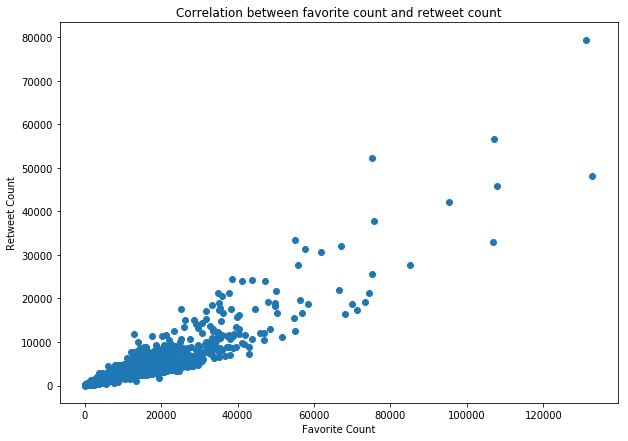

In [51]:
#Get plot 
fig = plt.figure(figsize=(10, 7))
plt.scatter(twitter_archive_clean.favorite_count, twitter_archive_clean.retweet_count)
plt.title("Correlation between favorite count and retweet count")
plt.xlabel("Favorite Count")
plt.ylabel("Retweet Count")


#### It seams we have a positve corralation. The greater the number of favorite count, the greater the retweet count

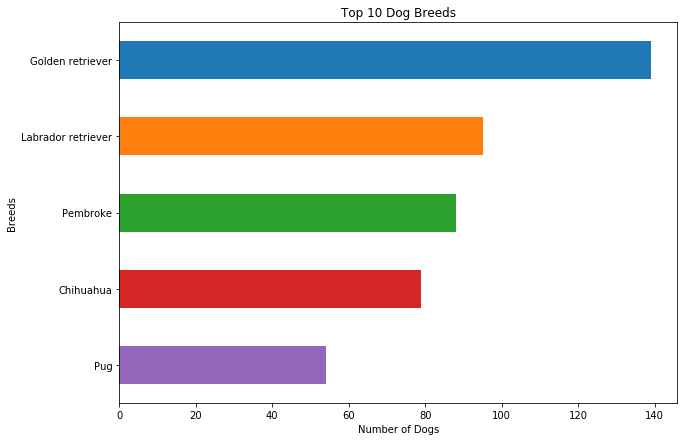

In [52]:
top_5_dog_breeds = twitter_archive_clean.probability1.value_counts().nlargest(5)
top_5_dog_breeds.plot(kind="barh", figsize=(10,7));
plt.xlabel("Number of Dogs")
plt.ylabel("Breeds")
plt.title("Top 10 Dog Breeds")
plt.gca().invert_yaxis()
plt.show();

#### It seems more there are more tweets with Golden retriever, so we can say in this study the most popular dog is a Golden retriver